#In this challenge, we aim to automate an energy-saving system using AI models in Google Colab. Here are the detailed steps and their objectives:



---



#Step 1: Load Energy Usage Data into Google Colab
**Explanation**: Load the HVAC energy usage dataset from Kaggle into Google Colab to begin the analysis and modeling process.

**Outcome**: A DataFrame containing HVAC energy usage data.

**Instructions**:
* Go to Kaggle and download the "Energy-consumption-prediction"
* Upload the dataset to your Google Colab environment.


---



In [ ]:
import pandas as pd
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset
energy_data = pd.read_csv("Energy_consumption.csv")

# Check the columns in the dataset
energy_data.columns

# Display the first few rows
energy_data.head()



Saving Energy_consumption.csv to Energy_consumption.csv


Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

  HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0        On           Off         2.774699     Monday      No   
1        On            On        21.831384   Saturday      No   
2       Off           Off         6.764672     Sunday      No   
3       Off            On         8.623447  Wednesday      No   
4        On           Off         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732

#Visualization 1: Plot Energy Usage Patterns to Understand the Data

**Explanation**: Visualize the energy usage data to identify patterns and anomalies.

**Outcome**: Line plot showing the energy usage patterns over time.

**Instructions**:
* Use Matplotlib and Seaborn libraries for visualization.
* Create a line plot for energy usage patterns



---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Timestamp' to datetime format
energy_data['Timestamp'] = pd.to_datetime(energy_data['Timestamp'])

# Plot the distribution of energy consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=energy_data, x='Timestamp', y='EnergyConsumption')
plt.title('Energy Consumption Patterns')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#Step 2: Process and Prepare Data


---


**Explanation**: Prepare the data by separating features and target variable, and standardize the features.

**Outcome**: Prepared and standardized data ready for model training.

**Instructions**:

* Convert categorical data to numeric.
* Split the data into training and testing sets.
* Standardize the features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert categorical data to numeric
energy_data['DayOfWeek'] = energy_data['DayOfWeek'].astype('category').cat.codes
energy_data['Holiday'] = energy_data['Holiday'].astype('category').cat.codes

# Prepare the data by separating features and target variable
X = energy_data.drop(['Timestamp', 'EnergyConsumption'], axis=1)
y = energy_data['EnergyConsumption']

# Convert any non-numeric columns to numeric (e.g., 'Off' to 0 and 'On' to 1)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].map({'Off': 0, 'On': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Step 3: Use TensorFlow to Create a Model Predicting Energy Usage


---



**Explanation**: Build a neural network model using TensorFlow to predict energy consumption based on the dataset.

**Outcome**: A trained neural network model that predicts energy consumption.

**Instructions**:
* Prepare the data by separating features and the target variable.
* Split the data into training and testing sets.
* Standardize the features.
* Build, compile, and train the neural network model.



---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)


Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 5723.3115 - mae: 75.2170 - val_loss: 5392.2002 - val_mae: 72.9314
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 4739.3330 - mae: 68.2945 - val_loss: 3735.2766 - val_mae: 60.5316
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 2430.0481 - mae: 47.5740 - val_loss: 889.4573 - val_mae: 28.3492
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 342.4391 - mae: 15.2488 - val_loss: 193.0625 - val_mae: 11.3277
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 201.2350 - mae: 11.1942 - val_loss: 109.0492 - val_mae: 8.0753
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 159.6806 - mae: 10.0735 - val_loss: 96.4215 - val_mae: 7.5598
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 143.2939 - mae: 9.5520 - val_loss: 92.0336 - val_mae: 7.4173
Epoch 8/100
20/20 [======================

#Visualization 2: Visualize the Relationship Between Energy Consumption and Other Features Using Pair Plots

**Explanation**: Visualize the relationship between energy consumption and other numerical features using pair plots.

**Outcome**: Pair plots showing the relationships between energy consumption and other features.

**Instructions**:

* Create pair plots to visualize the relationships between energy consumption and other features.

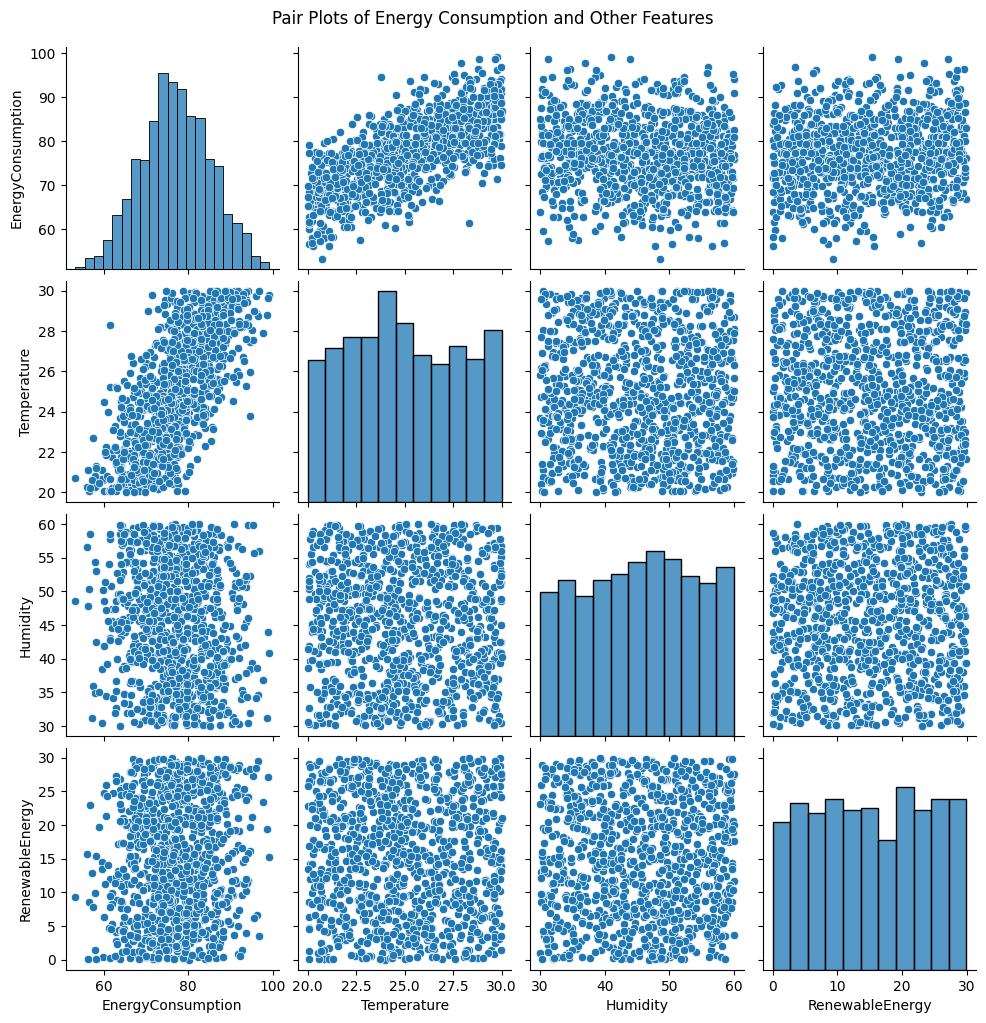

In [ ]:
sns.pairplot(energy_data[['EnergyConsumption', 'Temperature', 'Humidity', 'HVACUsage', 'LightingUsage', 'RenewableEnergy']])
plt.suptitle('Pair Plots of Energy Consumption and Other Features', y=1.02)
plt.show()


#Step 4: Automate the System to Make Real-Time Adjustments Based on Data


---


**Explanation**: Implement automation to adjust energy consumption in real-time based on predictions.

**Outcome**: Automated system making real-time adjustments.

**Instructions**:
* Develop a function to simulate real-time adjustments based on the model’s predictions.
* Integrate this function into the system to adjust energy usage dynamically.

In [ ]:
def adjust_energy_usage(predicted_usage):
    if predicted_usage > 80:
        return "Decrease HVAC usage"
    elif predicted_usage < 60:
        return "Increase HVAC usage"
    else:
        return "Maintain current settings"

# Make predictions and apply adjustments
adjustments = [adjust_energy_usage(model.predict(X_test[i].reshape(1, -1))[0][0]) for i in range(len(X_test))]


1/1 [==============================] - 0s 28ms/step


# Step 5: Document the Model's Performance and Prepare It for Integration


---


**Explanation**: Evaluate the model's performance and save it for future use.

**Outcome**: A saved model file and documented performance metrics.

**Instructions**:

* Evaluate the model on the test set.
* Save the model.
* Document the performance metrics.

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the model for later use
model.save('energy_consumption_model.h5')


7/7 [==============================] - 0s 3ms/step - loss: 32.6335 - mae: 4.5845
Test Loss: [32.633487701416016, 4.584499835968018]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Visualization 3: Plot Actual vs. Predicted Energy Consumption

**Explanation**: Visualize the model's predictions compared to the actual energy consumption values to assess its performance.

**Outcome**: A scatter plot showing the actual vs. predicted energy consumption with a diagonal line representing perfect predictions.

**Instructions**:

* Make predictions on the test set.
* Create a scatter plot to compare predicted vs. actual energy consumption.
* Add a diagonal line representing the average energy consumption across all points.


7/7 [==============================] - 0s 3ms/step


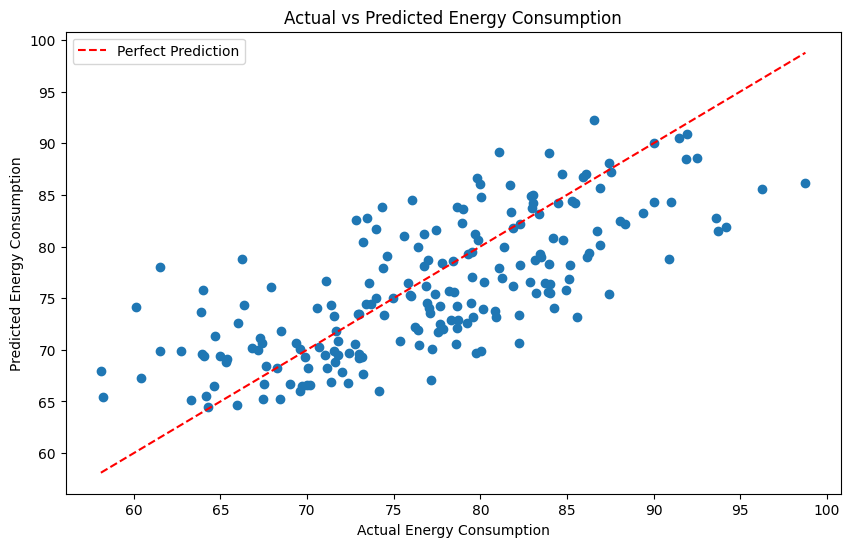

In [ ]:
# Make predictions
y_pred = model.predict(X_test).flatten()

# Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()
